In [ ]:
! pip install pandas
! pip install numpy
! pip install matplotlib
! pip install seaborn
! pip install scipy

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.colors as mcolors
from scipy.stats import pearsonr
from scipy.stats import ttest_ind
from scipy.stats import ttest_rel

## trial-by-trial Corr ET-MD, Experiment 1

In [84]:
# load the data:
D = pd.read_table('/Users/alighavampour/Desktop/Projects/EFC2/analysis/efc1_all.tsv')
D['RT'] = D['RT'].astype('float64')/1000
D['ET'] = D['ET'].astype('float64')/1000
D['MD'] = D['MD'].astype('float64')
D = D[(D.trialCorr==1)]
sn_list = D.sn.unique()

rho = []
for sn in sn_list:
    D_sn = D[D.sn==sn]
    r, p = pearsonr(D_sn['ET'], D_sn['MD'])
    rho.append(r)

print(f'MD-ET correlation: {np.mean(rho):.3f} +/- {np.std(rho):.3f}')

MD-ET correlation: 0.653 +/- 0.041


## trial-by-trial  Corr ET-MD, Experiment 2

In [69]:
# load the data:
D = pd.read_csv('/Users/alighavampour/Desktop/Projects/EFC2/analysis/efc2_all.csv')
D = D[(D.trial_correct==1) & (D.trained==1)]
D['ET'] = D['ET'].astype('float64')/1000
D['MD'] = D['MD'].astype('float64')
sn_list = D.sn.unique()

rho = []
for sn in sn_list:
    D_sn = D[D.sn==sn]
    r, p = pearsonr(D_sn['ET'], D_sn['MD'])
    rho.append(r)

print(f'MD-ET correlation: {np.mean(rho):.3f} +/- {np.std(rho):.3f}')

MD-ET correlation: 0.650 +/- 0.065


## Corr ET-MD across chords Experiment 1

In [85]:
# load the data:
D = pd.read_table('/Users/alighavampour/Desktop/Projects/EFC2/analysis/efc1_all.tsv')
D['RT'] = D['RT'].astype('float64')/1000
D['ET'] = D['ET'].astype('float64')/1000
D['MD'] = D['MD'].astype('float64')
D = D[(D.trialCorr==1) & (D.sess>=3)]

D = D.groupby(['sn','chordID']).mean().reset_index()
sn_list = D.sn.unique()

rho = []
for sn in sn_list:
    D_sn = D[D.sn==sn]
    r, p = pearsonr(D_sn['ET'], D_sn['MD'])
    rho.append(r)

print(f'MD-ET correlation: {np.mean(rho):.3f} +/- {np.std(rho):.3f}')

MD-ET correlation: 0.820 +/- 0.052


## Reaction time 242 chords

In [64]:
# load the data:
D = pd.read_table('/Users/alighavampour/Desktop/Projects/EFC2/analysis/efc1_all.tsv')
D['RT'] = D['RT'].astype('float64')/1000
D = D.iloc[::5] # only look at first repetition
D = D[(D.trialCorr==1)]
sn_list = D.sn.unique()

medians = []
for sn in sn_list:
    print(f's{sn}, median RT: {D[D.sn==sn].RT.median():.2f}s')
    medians.append(D[D.sn==sn].RT.median())
print(f'median RT: {np.median(medians):.2f}s')
print()

# RT improvement from day 1 to day 4:
D = pd.read_table('/Users/alighavampour/Desktop/Projects/EFC2/analysis/efc1_all.tsv')
D['RT'] = D['RT'].astype('float64')/1000
D['MT'] = D['MT'].astype('float64')/1000
D = D.iloc[::5] # only look at first repetition
D1 = D[(D.trialCorr==1) & (D.sess==1)]
D4 = D[(D.trialCorr==1) & (D.sess==4)]
sn_list = D.sn.unique()

RT_day1 = []
RT_day4 = []
MT_day1 = []
MT_day4 = []
for sn in sn_list:
    RT_day1.append(D1[D1.sn==sn].RT.median())
    RT_day4.append(D4[D4.sn==sn].RT.median())
    MT_day1.append(D1[D1.sn==sn].MT.median())
    MT_day4.append(D4[D4.sn==sn].MT.median())

# t-test:
t,p = ttest_rel(RT_day1, RT_day4)
print(f'RT day 1: {np.median(RT_day1):.2f} +/- {np.std(RT_day1)/np.sqrt(len(RT_day1)):.3f}')
print(f'RT day 4: {np.median(RT_day4):.2f} +/- {np.std(RT_day4)/np.sqrt(len(RT_day4)):.3f}')
print(f't-test: t({len(RT_day1)-1})={t:.2f}, p={p:.3e}')
print()
t,p = ttest_rel(MT_day1, MT_day4)
print(f'MT day 1: {np.median(MT_day1):.2f} +/- {np.std(MT_day1)/np.sqrt(len(MT_day1)):.3f}')
print(f'MT day 4: {np.median(MT_day4):.2f} +/- {np.std(MT_day4)/np.sqrt(len(MT_day4)):.3f}')
print(f't-test: t({len(MT_day1)-1})={t:.2f}, p={p:.3e}')



s1, median RT: 0.31s
s2, median RT: 0.56s
s3, median RT: 0.28s
s4, median RT: 0.35s
s5, median RT: 0.46s
s6, median RT: 0.33s
s7, median RT: 0.51s
s8, median RT: 0.58s
s9, median RT: 0.56s
s10, median RT: 0.28s
s11, median RT: 0.32s
s15, median RT: 0.27s
s16, median RT: 0.41s
s17, median RT: 0.22s
median RT: 0.34s

RT day 1: 0.47 +/- 0.030
RT day 4: 0.32 +/- 0.033
t-test: t(13)=6.53, p=1.899e-05

MT day 1: 2.22 +/- 0.177
MT day 4: 1.22 +/- 0.102
t-test: t(13)=7.10, p=8.046e-06


## Corr RT-MT, Experiment 1

In [79]:
# Correlation between RT and MT:
D = pd.read_table('/Users/alighavampour/Desktop/Projects/EFC2/analysis/efc1_all.tsv')
D['RT'] = D['RT'].astype('float64')/1000
D['MT'] = D['MT'].astype('float64')/1000
D = D.iloc[::5] # only look at first repetition
D = D[(D.trialCorr==1)]

D = D.groupby(['sn','chordID']).agg(
    RT=('RT', 'median'),
    ET=('ET', 'median'),
    MT=('MT', 'median'),
).reset_index()

sn_list = D.sn.unique()
rho = []
for sn in sn_list:
    D_sn = D[D.sn==sn]
    r, p = pearsonr(D_sn['RT'], D_sn['MT'])
    rho.append(r)

print(f'RT-MT correlation: {np.mean(rho):.2f}')


RT-MT correlation: 0.20


## Reaction time Experiment 2

In [83]:
# load the data:
D = pd.read_csv('/Users/alighavampour/Desktop/Projects/EFC2/analysis/efc2_all.csv')
D['RT'] = D['RT'].astype('float64')/1000
D = D[(D.trial_correct==1) & (D.trained==1)]
sn_list = D.sn.unique()

medians = []
for sn in sn_list:
    medians.append(D[D.sn==sn].RT.median())

median_RT = np.median(medians)
range = (np.min(medians), np.max(medians))
print(f'median RT: {median_RT:.2f}s, range: {range}')


# RT and MT improvement from day 1 to day 5:
D = pd.read_csv('/Users/alighavampour/Desktop/Projects/EFC2/analysis/efc2_all.csv')
D['RT'] = D['RT'].astype('float64')/1000
D['ET'] = D['ET'].astype('float64')/1000
D['MT'] = D['ET'] - D['RT']
D = D[D.trained==1]

D1 = D[(D.trial_correct==1) & (D.day==1)]
D5 = D[(D.trial_correct==1) & (D.day==5)]
sn_list = D.sn.unique()

RT_day1 = []
RT_day5 = []
MT_day1 = []
MT_day5 = []
for sn in sn_list:
    RT_day1.append(D1[D1.sn==sn].RT.median())
    RT_day5.append(D5[D5.sn==sn].RT.median())
    MT_day1.append(D1[D1.sn==sn].MT.median())
    MT_day5.append(D5[D5.sn==sn].MT.median())

# t-test:
t,p = ttest_rel(RT_day1, RT_day5)
print(f'RT day 1: {np.median(RT_day1):.2f} +/- {np.std(RT_day1)/np.sqrt(len(RT_day1)):.3f}')
print(f'RT day 4: {np.median(RT_day5):.2f} +/- {np.std(RT_day5)/np.sqrt(len(RT_day5)):.3f}')
print(f't-test: t({len(RT_day1)-1})={t:.2f}, p={p:.3e}')
print()
t,p = ttest_rel(MT_day1, MT_day5)
print(f'MT day 1: {np.median(MT_day1):.2f} +/- {np.std(MT_day1)/np.sqrt(len(MT_day1)):.3f}')
print(f'MT day 4: {np.median(MT_day5):.2f} +/- {np.std(MT_day5)/np.sqrt(len(MT_day5)):.3f}')
print(f't-test: t({len(MT_day1)-1})={t:.2f}, p={p:.3e}')



median RT: 0.39s, range: (np.float64(0.292), np.float64(0.488))
RT day 1: 0.47 +/- 0.020
RT day 4: 0.38 +/- 0.014
t-test: t(13)=4.89, p=2.944e-04

MT day 1: 1.61 +/- 0.148
MT day 4: 0.35 +/- 0.071
t-test: t(13)=11.81, p=2.533e-08


## Corr RT-MT, Experiment 2:

In [78]:
# Correlation between RT and MT:
D = pd.read_csv('/Users/alighavampour/Desktop/Projects/EFC2/analysis/efc2_all.csv')
D['RT'] = D['RT'].astype('float64')/1000
D['ET'] = D['ET'].astype('float64')/1000
D['MT'] = D['ET'] - D['RT']
D = D[(D.trial_correct==1) & (D.trained==1)]

D = D.groupby(['sn','chordID']).agg(
    RT=('RT', 'median'),
    ET=('ET', 'median'),
    MT=('MT', 'median'),
).reset_index()

sn_list = D.sn.unique()
rho = []
for sn in sn_list:
    D_sn = D[D.sn==sn]
    r, p = pearsonr(D_sn['RT'], D_sn['MT'])
    rho.append(r)

print(f'RT-MT correlation: {np.mean(rho):.3f}')


RT-MT correlation: 0.467


## EFC1 Reliability

### cross-validated group correlation

/var/folders/5y/1pn48fgn7yb77gc17h_5jms80000gp/T/ipykernel_73330/3298570309.py:54: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([1,2,3,4])


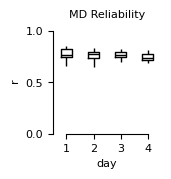

In [319]:
# load the data:
D = pd.read_table('/Users/alighavampour/Desktop/Projects/EFC1/analysis/efc1_chord.tsv')
D['MD'] = D['MD'].astype('float64')
D['ET'] = D['ET'].astype('float64')
# days = D['sess'].unique()
sn_list = D.sn.unique()

day_vec = []
sn_vec = []
r = []
# loop on participants:
for sn in sn_list:
    # loop on days:
    for day in [1,2,3,4]:
        D_sn = D[(D.sn == sn) & (D.sess == day)]
        
        # Get the MD values for this subject and day, grouped by chordID
        subject_md = D_sn.groupby('chordID')['MD'].mean().values.flatten()
        
        # Get MD values for all other subjects on the same day
        D_not_sn = D[(D.sn != sn) & (D.sess == day)]
        group_mean = D_not_sn.groupby('chordID')['MD'].mean().values.flatten()

        nas = np.logical_or(np.isnan(subject_md), np.isnan(group_mean))
        subject_md = subject_md[~nas]
        group_mean = group_mean[~nas]
        
        # Now both series have the same index in the same order
        r.append(pearsonr(subject_md, group_mean)[0])
        day_vec.append(day)
        sn_vec.append(sn)

df = pd.DataFrame(columns=['sn','r','day'])
df['sn'] = sn_vec
df['r'] = r
df['day'] = day_vec

# box plot correlations:
plt.rcParams.update({
    'font.size': 8,                 # Default text size
    'axes.titlesize': 8,            # Title size
    'axes.labelsize': 8,            # Axis label size
    'xtick.labelsize': 8,           # X-tick label size
    'ytick.labelsize': 8,           # Y-tick label size
    'legend.fontsize': 8,           # Legend font size
    'figure.titlesize': 8           # Figure title size
})

fig, ax = plt.subplots(figsize=(1.4, 1.4))
sns.boxplot(data=df, x='day', y='r', width=0.4, fill=False, linewidth=1, color='black', fliersize=0, showcaps=False)
plt.title('MD Reliability')
plt.xlabel('day')
plt.ylim((0,1.05))
ax.set_xticklabels([1,2,3,4])

xlim = ax.get_xlim()
ylim = ax.get_ylim()
sns.despine(ax=ax)
# Set the bounds of the remaining spines to match the data limits
ax.spines['left'].set_bounds(0, 1)
ax.spines['bottom'].set_bounds(0,3)
plt.savefig('/Users/alighavampour/Desktop/Projects/EFC1/figures/efc1_MD_reliability.pdf', bbox_inches='tight')
plt.show()

### pariwise subject correlation

/var/folders/5y/1pn48fgn7yb77gc17h_5jms80000gp/T/ipykernel_73330/3763914209.py:44: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([1,2,3,4])


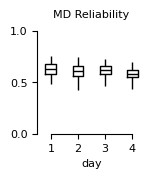

In [386]:
# load the data:
D = pd.read_table('/Users/alighavampour/Desktop/Projects/EFC1/analysis/efc1_chord.tsv')
D['MD'] = D['MD'].astype('float64')
D['ET'] = D['ET'].astype('float64')
# days = D['sess'].unique()
sn_list = D.sn.unique()

r_vec = []
day_vec = []
for day in [1,2,3,4]:
    data = []
    for sn in sn_list:
        D_sn = D[(D.sn == sn) & (D.sess == day)]

        # Get the MD values for this subject and day, grouped by chordID
        subject_md = D_sn.groupby('chordID')['MD'].mean().values.flatten()

        data.append(subject_md)
    data = np.column_stack(data)
    df = pd.DataFrame(data)
    correlation_matrix = df.corr().to_numpy()

    # get the upper triangle of the correlation matrix:
    correlation_vec = correlation_matrix[np.triu_indices(np.shape(correlation_matrix)[0], k=1)]
    r_vec.extend(correlation_vec)
    day_vec.extend(np.repeat(day, len(correlation_vec)))

# box plot
plt.rcParams.update({
    'font.size': 8,                 # Default text size
    'axes.titlesize': 8,            # Title size
    'axes.labelsize': 8,            # Axis label size
    'xtick.labelsize': 8,           # X-tick label size
    'ytick.labelsize': 8,           # Y-tick label size
    'legend.fontsize': 8,           # Legend font size
    'figure.titlesize': 8           # Figure title size
})

fig, ax = plt.subplots(figsize=(1.4, 1.4))
sns.boxplot(x=day_vec, y=r_vec, width=0.4, fill=False, linewidth=1, color='black', fliersize=0, showcaps=False)
plt.title('MD Reliability')
plt.xlabel('day')
plt.ylim((0,1.05))
ax.set_xticklabels([1,2,3,4])

xlim = ax.get_xlim()
ylim = ax.get_ylim()
sns.despine(ax=ax)
# Set the bounds of the remaining spines to match the data limits
ax.spines['left'].set_bounds(0, 1)
ax.spines['bottom'].set_bounds(0,3)
plt.savefig('/Users/alighavampour/Desktop/Projects/EFC1/figures/efc1_MD_reliability.pdf', bbox_inches='tight')
plt.show()

/var/folders/5y/1pn48fgn7yb77gc17h_5jms80000gp/T/ipykernel_73330/2447946588.py:54: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([1,2,3,4])


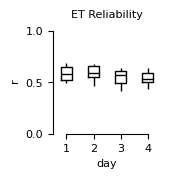

In [320]:
# load the data:
D = pd.read_table('/Users/alighavampour/Desktop/Projects/EFC1/analysis/efc1_chord.tsv')
D['MD'] = D['MD'].astype('float64')
D['ET'] = D['ET'].astype('float64')
# days = D['sess'].unique()
sn_list = D.sn.unique()

day_vec = []
sn_vec = []
r = []
# loop on participants:
for sn in sn_list:
    # loop on days:
    for day in [1,2,3,4]:
        D_sn = D[(D.sn == sn) & (D.sess == day)]
        
        # Get the ET values for this subject and day, grouped by chordID
        subject_md = D_sn.groupby('chordID')['ET'].mean().values.flatten()
        
        # Get ET values for all other subjects on the same day
        D_not_sn = D[(D.sn != sn) & (D.sess == day)]
        group_mean = D_not_sn.groupby('chordID')['ET'].mean().values.flatten()
        
        nas = np.logical_or(np.isnan(subject_md), np.isnan(group_mean))
        subject_md = subject_md[~nas]
        group_mean = group_mean[~nas]

        # Now both series have the same index in the same order
        r.append(pearsonr(subject_md, group_mean)[0])
        day_vec.append(day)
        sn_vec.append(sn)

df = pd.DataFrame(columns=['sn','r','day'])
df['sn'] = sn_vec
df['r'] = r
df['day'] = day_vec

# box plot correlations:
plt.rcParams.update({
    'font.size': 8,                 # Default text size
    'axes.titlesize': 8,            # Title size
    'axes.labelsize': 8,            # Axis label size
    'xtick.labelsize': 8,           # X-tick label size
    'ytick.labelsize': 8,           # Y-tick label size
    'legend.fontsize': 8,           # Legend font size
    'figure.titlesize': 8           # Figure title size
})

fig, ax = plt.subplots(figsize=(1.4, 1.4))
sns.boxplot(data=df, x='day', y='r', width=0.4, fill=False, linewidth=1, color='black', fliersize=0, showcaps=False)
plt.title('ET Reliability')
plt.xlabel('day')
plt.ylim((0,1.05))
ax.set_xticklabels([1,2,3,4])

xlim = ax.get_xlim()
ylim = ax.get_ylim()
sns.despine(ax=ax)
# Set the bounds of the remaining spines to match the data limits
ax.spines['left'].set_bounds(0, 1)
ax.spines['bottom'].set_bounds(0,3)
plt.savefig('/Users/alighavampour/Desktop/Projects/EFC1/figures/efc1_ET_reliability.pdf', bbox_inches='tight')
plt.show()

## Experiment 3 reliability

In [330]:
# load the data:
D = pd.read_table('/Users/alighavampour/Desktop/Projects/EFC_natChord/analysis/natChord_chord.tsv')
D['MD'] = D['MD'].astype('float64')
D['ET'] = D['MT'].astype('float64') + D['RT'].astype('float64')
# days = D['sess'].unique()
sn_list = D.sn.unique()

day_vec = []
sn_vec = []
r = []
# loop on participants:
for sn in sn_list:
    # loop on days:
    for day in [1]:
        D_sn = D[(D.sn == sn) & (D.sess == day)]
        
        # Get the MD values for this subject and day, grouped by chordID
        subject_md = D_sn.groupby('chordID')['MD'].mean().values.flatten()
        
        # Get MD values for all other subjects on the same day
        D_not_sn = D[(D.sn != sn) & (D.sess == day)]
        group_mean = D_not_sn.groupby('chordID')['MD'].mean().values.flatten()

        nas = np.logical_or(np.isnan(subject_md), np.isnan(group_mean))
        subject_md = subject_md[~nas]
        group_mean = group_mean[~nas]
        
        # Now both series have the same index in the same order
        r.append(pearsonr(subject_md, group_mean)[0])
        day_vec.append(day)
        sn_vec.append(sn)

df = pd.DataFrame(columns=['sn','r','day'])
df['sn'] = sn_vec
df['r'] = r
df['day'] = day_vec

# avg correlation:
print(f'MD avg correlation: {np.mean(r):.2f}')
print(f'MD sem correlation: {np.std(r)/np.sqrt(len(r)):.2f}, len(r): {len(r)}')


MD avg correlation: 0.86
MD sem correlation: 0.01, len(r): 10


In [332]:
# load the data:
D = pd.read_table('/Users/alighavampour/Desktop/Projects/EFC_natChord/analysis/natChord_chord.tsv')
D['MD'] = D['MD'].astype('float64')
D['ET'] = D['MT'].astype('float64') + D['RT'].astype('float64')
# days = D['sess'].unique()
sn_list = D.sn.unique()

day_vec = []
sn_vec = []
r = []
# loop on participants:
for sn in sn_list:
    # loop on days:
    for day in [1]:
        D_sn = D[(D.sn == sn) & (D.sess == day)]
        
        # Get the Et values for this subject and day, grouped by chordID
        subject_md = D_sn.groupby('chordID')['ET'].mean().values.flatten()
        
        # Get Et values for all other subjects on the same day
        D_not_sn = D[(D.sn != sn) & (D.sess == day)]
        group_mean = D_not_sn.groupby('chordID')['ET'].mean().values.flatten()

        nas = np.logical_or(np.isnan(subject_md), np.isnan(group_mean))
        subject_md = subject_md[~nas]
        group_mean = group_mean[~nas]
        
        # Now both series have the same index in the same order
        r.append(pearsonr(subject_md, group_mean)[0])
        day_vec.append(day)
        sn_vec.append(sn)

df = pd.DataFrame(columns=['sn','r','day'])
df['sn'] = sn_vec
df['r'] = r
df['day'] = day_vec

# avg correlation:
print(f'ET avg correlation: {np.mean(r):.2f}')
print(f'ET sem correlation: {np.std(r)/np.sqrt(len(r)):.2f}, len(r): {len(r)}')


ET avg correlation: 0.69
ET sem correlation: 0.01, len(r): 10


## Sex differences

### Experiment 1

MD, t=-0.19, p=0.85
ET, t=-1.76, p=0.08


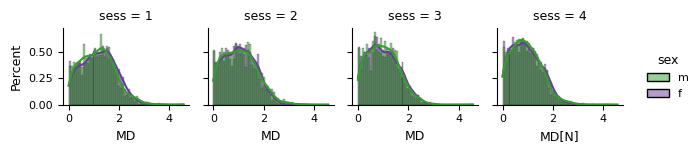

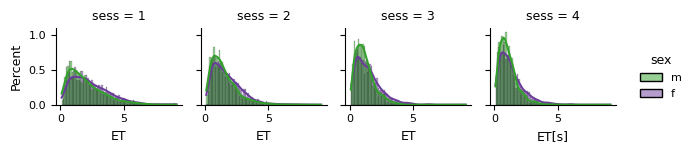

In [25]:
# load the data:
D = pd.read_table('/Users/alighavampour/Desktop/Projects/EFC1/analysis/efc1_chord.tsv')
D['MD'] = D['MD'].astype('float64')
D['ET'] = D['ET'].astype('float64')/1000

sn_list = D.sn.unique()
male = [1,2,4,5,9,10,15]
female = [3,6,7,8,11,16,17]

D['sex'] = np.where(D['sn'].isin(female), 'f', 'm')

# distribution plot male vs female:
plt.rcParams.update({
    'font.size': 9,                 # Default text size
    'axes.titlesize': 9,            # Title size
    'axes.labelsize': 9,            # Axis label size
    'xtick.labelsize': 8,           # X-tick label size
    'ytick.labelsize': 8,           # Y-tick label size
    'legend.fontsize': 8,           # Legend font size
    'figure.titlesize': 9           # Figure title size
})

cmap = plt.get_cmap('Paired')
sns.displot(data=D, x="MD", hue="sex", col='sess', kde=True, stat='percent', height=1.6, palette=[mcolors.to_hex(cmap(3)), mcolors.to_hex(cmap(9))])
plt.xlabel('MD[N]')
plt.savefig(f'/Users/alighavampour/Desktop/Projects/EFC1/figures/efc1_MD_mf.pdf')

cmap = plt.get_cmap('Paired')
sns.displot(data=D, x="ET", hue="sex", col='sess', kde=True, stat='percent', height=1.6, palette=[mcolors.to_hex(cmap(3)), mcolors.to_hex(cmap(9))])
plt.xlabel('ET[s]')
plt.savefig(f'/Users/alighavampour/Desktop/Projects/EFC1/figures/efc1_ET_mf.pdf')

# average across chords:
df_gp = D.groupby(['sn','sess'], as_index=False).agg({
    'MD': 'mean',
    'ET': 'mean',
    'sex': 'first'
})

male_MD = df_gp['MD'][(df_gp.sex=='m')]
female_MD = df_gp['MD'][(df_gp.sex=='f')]
male_ET = df_gp['ET'][(df_gp.sex=='m')]
female_ET = df_gp['ET'][(df_gp.sex=='f')]

# t-test:
res = ttest_ind(male_MD,female_MD, equal_var=True)
print(f'MD, t={res.statistic:.2f}, p={res.pvalue:.2f}')

res = ttest_ind(male_ET,female_ET, equal_var=True)
print(f'ET, t={res.statistic:.2f}, p={res.pvalue:.2f}')


### Experiment 2

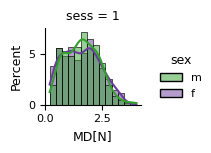

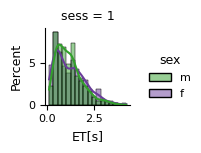

In [371]:
# load the data:
D = pd.read_table('/Users/alighavampour/Desktop/Projects/EFC_natChord/analysis/natChord_chord.tsv')
D['MD'] = D['MD'].astype('float64')
D['ET'] = D['MT'].astype('float64')/1000 + D['RT'].astype('float64')/1000

sn_list = D.sn.unique()
male = [1,2,3,4,6]
female = [5,7,8,9,10]

D['sex'] = np.where(D['sn'].isin(female), 'f', 'm')

# distribution plot male vs female:
plt.rcParams.update({
    'font.size': 9,                 # Default text size
    'axes.titlesize': 9,            # Title size
    'axes.labelsize': 9,            # Axis label size
    'xtick.labelsize': 8,           # X-tick label size
    'ytick.labelsize': 8,           # Y-tick label size
    'legend.fontsize': 8,           # Legend font size
    'figure.titlesize': 9           # Figure title size
})

cmap = plt.get_cmap('Paired')
sns.displot(data=D, x="MD", hue="sex", col='sess', kde=True, stat='percent', height=1.6, palette=[mcolors.to_hex(cmap(3)), mcolors.to_hex(cmap(9))])
plt.xlabel('MD[N]')
plt.savefig(f'/Users/alighavampour/Desktop/Projects/EFC1/figures/efc3_MD_mf.pdf')

cmap = plt.get_cmap('Paired')
sns.displot(data=D, x="ET", hue="sex", col='sess', kde=True, stat='percent', height=1.6, palette=[mcolors.to_hex(cmap(3)), mcolors.to_hex(cmap(9))])
plt.xlabel('ET[s]')
plt.savefig(f'/Users/alighavampour/Desktop/Projects/EFC1/figures/efc3_ET_mf.pdf')

# average across chords:
# df_gp = D.groupby(['sn','sess'], as_index=False).agg({
#     'MD': 'mean',
#     'ET': 'mean',
#     'sex': 'first'
# })
# for sess in [1,2,3,4]:
#     male_MD = df_gp['MD'][(df_gp.sess==sess) & (df_gp.sex=='m')]
#     female_MD = df_gp['MD'][(df_gp.sess==sess) & (df_gp.sex=='f')]
#     male_ET = df_gp['ET'][(df_gp.sess==sess) & (df_gp.sex=='m')]
#     female_ET = df_gp['ET'][(df_gp.sess==sess) & (df_gp.sex=='f')]

#     # t-test:
#     res = ttest_ind(male_MD,female_MD, equal_var=True)
#     print(f'MD, sess{sess}, t={res.statistic:.2f}, p={res.pvalue:.2f}')

#     res = ttest_ind(male_ET,female_ET, equal_var=True)
#     print(f'ET, sess{sess}, t={res.statistic:.2f}, p={res.pvalue:.2f}')


## extension vs flexion difficulty

### flex ext symmetry

/var/folders/5y/1pn48fgn7yb77gc17h_5jms80000gp/T/ipykernel_3787/3986536387.py:54: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(np.arange(32)+1)


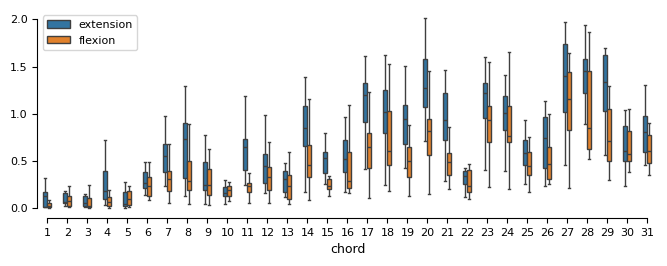

In [46]:
# load the data:
D = pd.read_table('/Users/alighavampour/Desktop/Projects/EFC1/analysis/efc1_chord.tsv')
D = D[D.sess>=3]

D['MD'] = D['MD'].astype('float64')
D['ET'] = D['ET'].astype('float64')/1000

# average across sessions:
df_gp = D.groupby(['sn','chordID'], as_index=False).agg({
    'MD': 'mean',
    'ET': 'mean',
})
# compare symmetry flexion and extension:
chords_unique = np.unique(df_gp['chordID'])
ext_only = [chords_unique[i] for i, x in enumerate(chords_unique) if (set(str(x)) == {'1','9'} or set(str(x)) == {'1'})]
ext_only = [19999, 91999, 99199, 99919, 99991,
            11999, 19199, 19919, 19991, 91199, 91919, 91991, 99119, 99191, 99911,
            11199, 11919, 11991, 19119, 19191, 19911, 91119, 91191, 91911, 99111,
            11119, 11191, 11911, 19111, 91111,
            11111]
MD = []
group = []
flex_ext = []
for i, chord in enumerate(ext_only):
    tmp = df_gp[df_gp['chordID'] == chord]
    MD.extend(tmp['MD'].values.flatten())
    group.extend(np.repeat(i, len(tmp)))
    flex_ext.extend(np.repeat('extension', len(tmp)))
    
    # flexion symmetry of chord:
    chord_sym = int(str(chord).replace('1', '2'))
    tmp = df_gp[df_gp['chordID'] == chord_sym]
    MD.extend(tmp['MD'].values.flatten())
    group.extend(np.repeat(i, len(tmp)))
    flex_ext.extend(np.repeat('flexion', len(tmp)))


# distribution plot male vs female:
plt.rcParams.update({
    'font.size': 9,                 # Default text size
    'axes.titlesize': 9,            # Title size
    'axes.labelsize': 9,            # Axis label size
    'xtick.labelsize': 8,           # X-tick label size
    'ytick.labelsize': 8,           # Y-tick label size
    'legend.fontsize': 8,           # Legend font size
    'figure.titlesize': 9           # Figure title size
})

fig, ax = plt.subplots(figsize=(8, 2.7))
sns.boxplot(data=None, x=group, y=MD, hue=flex_ext, width=0.4, fliersize=0)

plt.xlabel('chord')
plt.ylim((-0.1,2.1))
ax.set_xticklabels(np.arange(32)+1)
ax.set_yticks([0, 0.5, 1, 1.5, 2])

xlim = ax.get_xlim()
ylim = ax.get_ylim()
sns.despine(ax=ax)
# Set the bounds of the remaining spines to match the data limits
ax.spines['left'].set_bounds(0, 2)
ax.spines['bottom'].set_bounds(0,30)
plt.savefig('/Users/alighavampour/Desktop/Projects/EFC1/figures/efc1_MD_symmetry.pdf', bbox_inches='tight')

## Testing chords improvement

Chord 12129, t(7)=-0.16, p=0.88
Chord 12291, t(7)=-1.49, p=0.19
Chord 19111, t(7)=-1.24, p=0.26
Chord 21291, t(7)=0.53, p=0.62
Chord 22911, t(7)=-1.34, p=0.23
Chord 29212, t(5)=0.50, p=0.64
    -> Unsuccessful subjects: [np.int64(109), np.int64(110)]

Chord 91211, t(7)=-0.71, p=0.50
Chord 92122, t(6)=-0.13, p=0.90
    -> Unsuccessful subjects: [np.int64(112)]



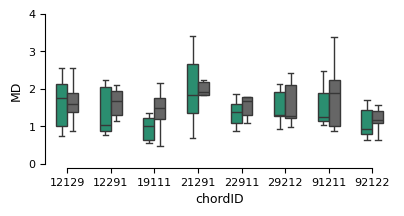

In [ ]:
D = pd.read_csv('/Users/alighavampour/Desktop/Projects/EFC2/analysis/efc2_all.csv')
D = D[D.trial_correct==1]
D['ET'] = D['ET'].astype('float')/1000
D['MD'] = D['MD'].astype('float64')

chords1 = [29212, 92122, 91211, 22911]
chords2 = [21291, 12129, 12291, 19111]

chords = [29212, 92122, 91211, 22911, 21291, 12129, 12291, 19111]

df = D[D.trained==0]
day1_rows = (df.day==1) & (df.BN>=7)
day5_rows = (df.day==5) & (df.BN<=2)
df = df[day1_rows | day5_rows]
df = df.groupby(['sn', 'chordID', 'day'], as_index=False).agg({
    'MD': 'mean',
    'ET': 'mean'
})

plt.rcParams.update({
    'font.size': 9,                 # Default text size
    'axes.titlesize': 9,            # Title size
    'axes.labelsize': 9,            # Axis label size
    'xtick.labelsize': 8,           # X-tick label size
    'ytick.labelsize': 8,           # Y-tick label size
    'legend.fontsize': 8,           # Legend font size
    'figure.titlesize': 9           # Figure title size
})
fig, ax = plt.subplots(figsize=(4.5, 2))
cmap = plt.get_cmap('Dark2')
sns.boxplot(data=df, x='chordID', y='MD', hue='day', fliersize=0, width=0.5, palette=[mcolors.to_hex(cmap(0)), mcolors.to_hex(cmap(7))], legend=False)
# sns.displot(data=df, x="MD", hue="day", col='chordID', kde=True, stat='count', height=1.7, aspect=1, palette=[mcolors.to_hex(cmap(0)), mcolors.to_hex(cmap(7))], legend=True)
# plt.title(f'{chord}')
# plt.xlabel('day')
plt.ylim((-0.1,4))
# ax.set_xticks()
# ax.set_xticklabels([1,5])
# ax.set_yticks([0, 2, 4, 6])

sns.despine(ax=ax)
# Set the bounds of the remaining spines to match the data limits
ax.spines['left'].set_bounds(0, 4)
ax.spines['bottom'].set_bounds(0,7)
plt.savefig(f'/Users/alighavampour/Desktop/Projects/EFC1/figures/efc2_general.pdf', bbox_inches='tight')

# t-test per chord:
chords = df['chordID'].unique()
for chord in chords:
    # select the MD of chord day 1:
    day1_MD = df['MD'][(df.chordID == chord) & (df.day == 1)].values.flatten()
    # select the MD of chord day 5:
    day5_MD = df['MD'][(df.chordID == chord) & (df.day == 5)].values.flatten()

    # find which subjects were unsuccessful:
    A = df['sn'][(df.chordID == chord) & (df.day == 1)].values.flatten()
    B = df['sn'][(df.chordID == chord) & (df.day == 5)].values.flatten()
    unsuccessful = list(set(A).symmetric_difference(set(B)))
    
    # remove the data of unsuccessful subjects from day1 and 5:
    day1_MD = day1_MD[~np.isin(A, unsuccessful)]
    day5_MD = day5_MD[~np.isin(B, unsuccessful)]

    # t-test:
    res = ttest_rel(day1_MD, day5_MD, alternative='two-sided')
    print(f'Chord {chord}, t({len(day1_MD)})={res.statistic:.2f}, p={res.pvalue:.2f}')
    if len(unsuccessful) != 0:
        # print unsuccessful subjects:
        print(f'    -> Unsuccessful subjects: {unsuccessful}\n')

## Add force patterns

In [ ]:
import pandas as pd
D = pd.read_table('./analysis/efc1_all.tsv')

# BN: Block number 
# TN: Trial number
# chordID: 2: flexion, 1: extension, 9: steady, thumb to pinky from left to right
# trial_correct: 1: correct, 0: incorrect, incorrect means subejct could not form the chord in the given 10 seconds
# sn: subject number
# day: day of the experiment
# ET: execution time, from go-cue to the moment chord is formed correctly. -1 for incorrect trials
# MD: mean deviation, our synchrony measure in N. It is the synchrony of figner forces during the execution measured in the 5-dimenional force space.
# num_fingers: number of pressed fingers in the chord. It's useful for some analyses.

df = pd.DataFrame(columns=['sn', 'BN', 'TN', 'day', 'chordID', 'num_fingers', 'trial_correct', 'ET', 'MD'])
df['sn'] = D['sn']
df['BN'] = D['BN']
df['TN'] = D['TN']
df['day'] = D['sess']
df['chordID'] = D['chordID']
df['num_fingers'] = D['num_fingers']
df['trial_correct'] = D['trialCorr']
df['ET'] = D['ET']
df.loc[df['ET'] == -2, 'ET'] = -1
df['MD'] = D['MD']
df['ET'] = df['ET'].astype('float64')
df['MD'] = df['MD'].astype('float64')

# save dataframe for Paul:
df.to_csv('/Users/alighavampour/Desktop/Projects/EFC1/analysis/efc1_Paul.csv', index=False)

df = pd.read_csv('/Users/alighavampour/Desktop/Projects/EFC1/analysis/efc1_Paul.csv')

